In [1]:
import pandas as pd

In [2]:
!gdown 17avT1w01dj9ELs8UiJS7yOmQkjd06Q3h

Downloading...
From: https://drive.google.com/uc?id=17avT1w01dj9ELs8UiJS7yOmQkjd06Q3h
To: /content/housePrice.csv
100% 155k/155k [00:00<00:00, 77.1MB/s]


In [3]:
df = pd.read_csv('housePrice.csv')

In [4]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


## Preprocessing

### 1

In [5]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [6]:
df.dropna()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


### 2

In [7]:
df['Price'].describe()

count    3.473000e+03
mean     5.354621e+09
std      8.104058e+09
min      3.600000e+06
25%      1.415000e+09
50%      2.880000e+09
75%      6.000000e+09
max      9.240000e+10
Name: Price, dtype: float64

In [8]:
count,mean,std,min,Q1,Q2,Q3,max = df['Price'].describe()

In [9]:
def get_price_level(price, q1, q2, q3):
    if price < q1:
        return 'cheap'
    elif price <= q2:
        return 'underMean'
    elif price <= q3:
        return 'upperMean'
    else:
        return 'expensive'

In [10]:
df['priceLevel'] = df['Price'].apply(get_price_level, q1=Q1, q2=Q2, q3=Q3)

### 3

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
df['Parking'] = le.fit_transform(df['Parking'])
df['Warehouse'] = le.fit_transform(df['Warehouse'])
df['Elevator'] = le.fit_transform(df['Elevator'])
df['Address'] = le.fit_transform(df['Address'])
df['priceLevel'] = le.fit_transform(df['priceLevel'])

In [13]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,1,1,1,156,1850000000,2
1,60,1,1,1,1,156,1850000000,2
2,79,2,1,1,1,117,550000000,0
3,95,2,1,1,1,152,902500000,0
4,123,2,1,1,1,150,7000000000,1
...,...,...,...,...,...,...,...,...
3468,86,2,1,1,1,163,3500000000,3
3469,83,2,1,1,1,105,6800000000,1
3470,75,2,0,0,0,115,365000000,0
3471,105,2,1,1,1,39,5600000000,3


### 4

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
df['Parking'] = scaler.fit_transform(df[['Parking']])
df['Warehouse'] = scaler.fit_transform(df[['Warehouse']])
df['Elevator'] = scaler.fit_transform(df[['Elevator']])
df['Address'] = scaler.fit_transform(df[['Address']])
df['Area'] = scaler.fit_transform(df[['Area']])
df['Room'] = scaler.fit_transform(df[['Room']])
df['Price'] = scaler.fit_transform(df[['Price']])

In [16]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,0.036707,0.2,1.0,1.0,1.0,0.812500,0.019983,2
1,0.033370,0.2,1.0,1.0,1.0,0.812500,0.019983,2
2,0.054505,0.4,1.0,1.0,1.0,0.609375,0.005914,0
3,0.072303,0.4,1.0,1.0,1.0,0.791667,0.009729,0
4,0.103448,0.4,1.0,1.0,1.0,0.781250,0.075722,1
...,...,...,...,...,...,...,...,...
3468,0.062291,0.4,1.0,1.0,1.0,0.848958,0.037841,3
3469,0.058954,0.4,1.0,1.0,1.0,0.546875,0.073557,1
3470,0.050056,0.4,0.0,0.0,0.0,0.598958,0.003911,0
3471,0.083426,0.4,1.0,1.0,1.0,0.203125,0.060569,3


### 5

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
print(X_train)
print(y_train)

          Area  Room  Parking  Warehouse  Elevator   Address  priceLevel
1822  0.150167   0.6      1.0        1.0       1.0  0.703125           1
2335  0.030033   0.2      1.0        1.0       0.0  0.734375           0
3350  0.055617   0.4      1.0        1.0       1.0  0.135417           3
3049  0.133482   0.6      1.0        1.0       1.0  0.619792           0
611   0.100111   0.4      1.0        1.0       1.0  0.791667           0
...        ...   ...      ...        ...       ...       ...         ...
1095  0.083426   0.4      1.0        1.0       1.0  0.760417           3
1130  0.211346   0.6      1.0        1.0       1.0  0.354167           1
1294  0.063404   0.4      1.0        1.0       1.0  0.546875           3
860   0.139043   0.6      1.0        1.0       1.0  0.781250           1
3174  0.100111   0.4      1.0        1.0       1.0  0.661458           2

[2778 rows x 7 columns]
1822    0.113602
2335    0.009377
3350    0.032430
3049    0.008241
611     0.011325
          ... 

In [21]:
print(X_test)
print(y_test)

          Area  Room  Parking  Warehouse  Elevator   Address  priceLevel
3000  0.127920   0.6      1.0        1.0       1.0  0.791667           2
1681  0.074527   0.4      1.0        1.0       1.0  0.848958           3
812   0.105673   0.6      1.0        1.0       1.0  0.635417           1
3164  0.027809   0.2      1.0        1.0       1.0  0.953125           2
229   0.048943   0.4      1.0        1.0       1.0  0.052083           2
...        ...   ...      ...        ...       ...       ...         ...
547   0.066741   0.4      1.0        1.0       1.0  0.635417           3
764   0.066741   0.4      1.0        1.0       1.0  0.005208           3
3428  0.063404   0.4      1.0        1.0       1.0  1.000000           0
3245  0.038932   0.4      1.0        1.0       1.0  0.812500           2
568   0.281424   0.6      1.0        1.0       1.0  0.984375           1

[695 rows x 7 columns]
3000    0.018793
1681    0.041954
812     0.068146
3164    0.023230
229     0.018382
          ...  

In [22]:
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (2778, 7)
y_train size: (2778,)
X_test size: (695, 7)
y_test size: (695,)


## Prediction using ML algorithms

### Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
X_train = X_train.drop(['priceLevel'], axis=1)
X_test = X_test.drop(['priceLevel'],axis=1)

#### linear regression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)

Accuracy score is not a suitable metric for regression problems as accuracy measures how many predictions were correct out of the total number of predictions, which is not meaningful in regression where the output is a continuous variable. Instead, we typically use metrics like mean squared error (MSE), root mean squared error (RMSE), and R-squared to evaluate the performance of a regression model.

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse : {mse}')
print(f'r2 score : {r2}')

mse : 0.0033722380080456397
r2 score : 0.5795209171192297


#### Polynomial Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
from uuid import RFC_4122
def regression_degree(degree):
  poly = PolynomialFeatures(degree=2)
  X_poly = poly.fit_transform(X_train)
  model = LinearRegression()
  model.fit(X_poly, y_train)
  y_pred = model.predict(poly.fit_transform(X_test))
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse,r2

In [30]:
print(f'mse for degree of 2 : {regression_degree(2)[0]} , R2-score for degree of 2 : {regression_degree(2)[1]}')
print(f'mse for degree of 3 : {regression_degree(3)[0]} , R2-score for degree of 3 : {regression_degree(3)[1]}')

mse for degree of 2 : 0.0023006960070592977 , R2-score for degree of 2 : 0.7131298132789888
mse for degree of 3 : 0.0023006960070592977 , R2-score for degree of 3 : 0.7131298132789888


### Classification



In [31]:
X = df.drop(['priceLevel','Price'],axis=1)
y = df['priceLevel']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597122302158273


#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.753956834532374


#### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
def knn(n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with k {n_neighbors}: {accuracy}")

In [39]:
knn(3)
knn(5)
knn(7)

Accuracy with k 3: 0.7424460431654676
Accuracy with k 5: 0.720863309352518
Accuracy with k 7: 0.7107913669064748


#### SVM

##### linear SVM

In [40]:
from sklearn.svm import LinearSVC

In [41]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5597122302158274


##### nonlinear SVM

In [42]:
from sklearn.svm import SVC

In [43]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5525179856115108


## Classification using Deep learning

In [44]:
import tensorflow as tf
from keras.utils import to_categorical

In [45]:
y_train = to_categorical(y_train)

In [46]:
y_test = to_categorical(y_test)

### model

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [48]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=20, batch_size=128,validation_data=(X_test, y_test))

Epoch 1/20
22/22 [==============================] - 0s 6ms/step - loss: 0.9543 - accuracy: 0.6091 - val_loss: 0.9131 - val_accuracy: 0.6101
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.9469 - accuracy: 0.6109 - val_loss: 0.9712 - val_accuracy: 0.6029
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.9406 - accuracy: 0.6166 - val_loss: 0.9037 - val_accuracy: 0.6230
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.9366 - accuracy: 0.6098 - val_loss: 0.9260 - val_accuracy: 0.6058
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.9483 - accuracy: 0.6094 - val_loss: 0.9381 - val_accuracy: 0.6129
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.9550 - accuracy: 0.6076 - val_loss: 0.9196 - val_accuracy: 0.6201
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.9516 - accuracy: 0.5990 - val_loss: 0.9031 - val_accuracy: 0.6360
Epoch 8/20
22/22 [==

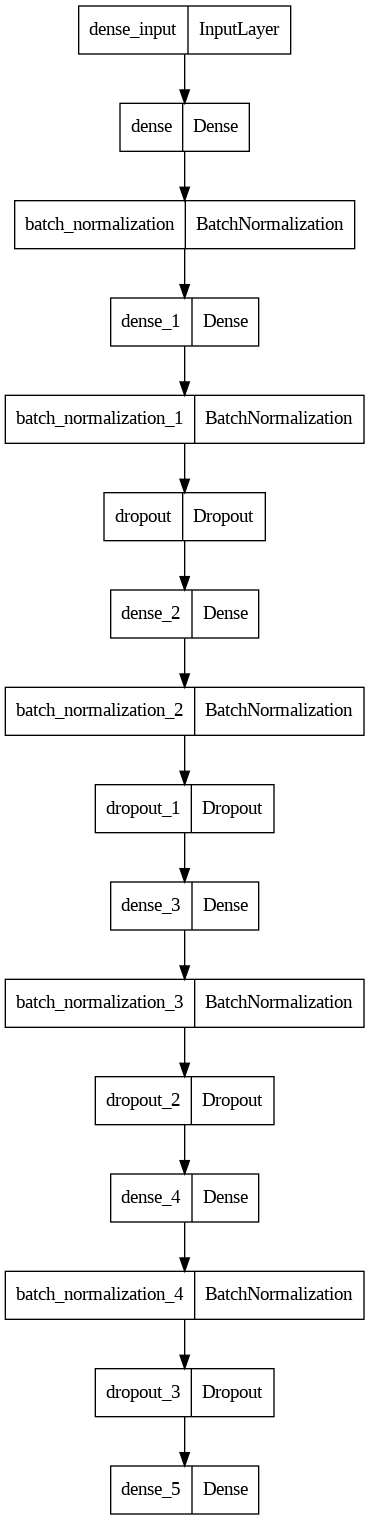

In [60]:
tf.keras.utils.plot_model(model)

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.8890 - accuracy: 0.6432


### confusion matrix

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [63]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

22/22 [==============================] - 0s 1ms/step


In [64]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[ 87  11  29  44]
 [  1 136   0  26]
 [ 32  17 106  36]
 [  5  29  18 118]]


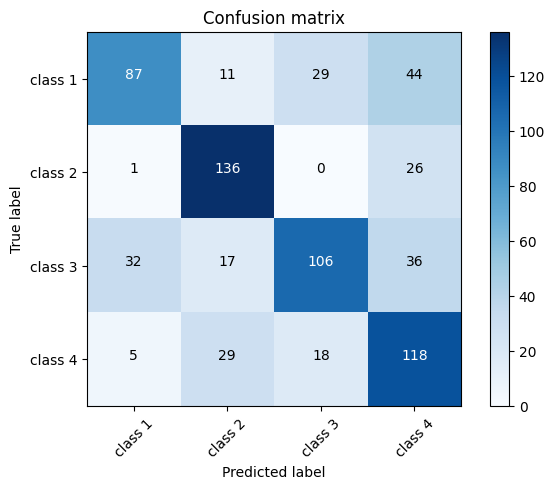

In [65]:
# define class names (if applicable)
class_names = ['class 1', 'class 2', 'class 3', 'class 4']

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# add values inside the plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

EPOCH : 20

BATCH_SIZE : 128

LR : 0.001

OPTIMIZER : ADAM